In [1]:
import pandas as pd

df = pd.read_csv('result_cv/result_cv_sides.csv')

In [2]:
df

,model_key,valid_fold,sensitivity,specificity,accuracy,precision,mcc,micro_auroc,valid_mcc,train_bce,valid_bce,lr,finished_at
0,lm-gearnet-lrrange,0,1.0000,0.0010,0.0527,0.0518,0.0070,0.3409,0.0069,0.6747,0.6741,1.600000e-08,2023-11-05 22:32:28
1,lm-gearnet-lrrange,0,1.0000,0.0008,0.0525,0.0518,0.0064,0.3408,0.0059,0.6727,0.6723,2.500000e-08,2023-11-05 22:32:28
2,lm-gearnet-lrrange,0,1.0000,0.0008,0.0525,0.0518,0.0064,0.3421,0.0062,0.6696,0.6684,4.000000e-08,2023-11-05 22:32:28
3,lm-gearnet-lrrange,0,1.0000,0.0007,0.0525,0.0518,0.0060,0.3455,0.0059,0.6647,0.6664,6.300000e-08,2023-11-05 22:32:28
4,lm-gearnet-lrrange,0,1.0000,0.0008,0.0525,0.0518,0.0064,0.3539,0.0060,0.6569,0.6587,1.000000e-07,2023-11-05 22:32:28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,lm-gearnet-2-lrrange,0,0.0000,1.0000,0.9482,NaN,0.0000,0.3042,0.0000,92.2909,14369.3249,1.995262e-01,2023-11-12 19:28:56
558,lm-gearnet-2-lrrange,0,0.0000,1.0000,0.9482,NaN,0.0000,0.3463,0.0000,84.2686,775.9456,2.238721e-01,2023-11-12 19:28:56
559,lm-gearnet-2-lrrange,0,0.0000,0.9998,0.9480,0.0000,-0.0030,0.4237,0.0000,6.8607,31.4401,2.511886e-01,2023-11-12 19:28:56
560,lm-gearnet-2-lrrange,0,0.0813,0.9941,0.9468,0.4286,0.1694,0.5048,0.1551,0.5946,0.7730,2.818383e-01,2023-11-12 19:28:56


In [4]:
# find row with maximum valid_mcc
df.loc[df['micro_auroc'].idxmax()]

model_key       lm-gearnet-lrrange
valid_fold                       1
sensitivity                 0.5518
specificity                 0.9855
accuracy                    0.9631
precision                   0.6758
mcc                         0.5917
micro_auroc                  0.945
valid_mcc                   0.5371
train_bce                   0.0568
valid_bce                   0.1244
lr                        0.000032
finished_at    2023-11-05 23:37:03
Name: 71, dtype: object

In [3]:
df_l2 = df[df['model_key'] == 'lm-gearnet-2-lrrange']

<Axes: title={'center': 'LR Test: LM-GearNet-2'}, xlabel='lr'>

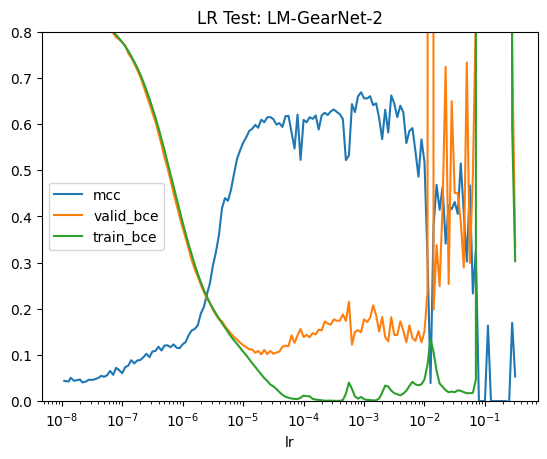

In [8]:
df_l2.plot(x='lr', y=['mcc', 'valid_bce', 'train_bce'], logx=True, ylim=(0, 0.8), title='LR Test: LM-GearNet-2')

<Axes: title={'center': 'LR Test: LM-GearNet-4'}, xlabel='lr'>

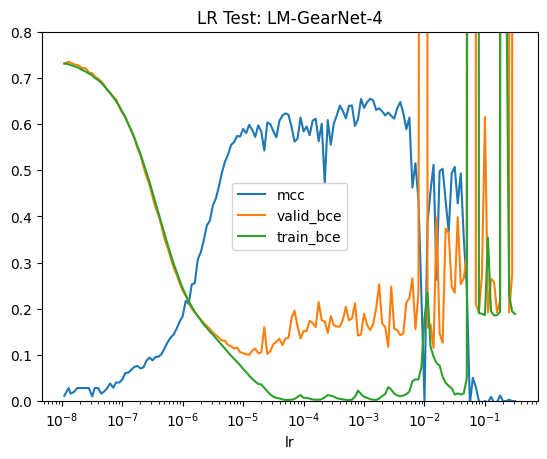

In [9]:
df[df['model_key'] == 'lm-gearnet-4-lrrange'].plot(x='lr', y=['mcc', 'valid_bce', 'train_bce'], logx=True, ylim=(0, 0.8), title='LR Test: LM-GearNet-4')

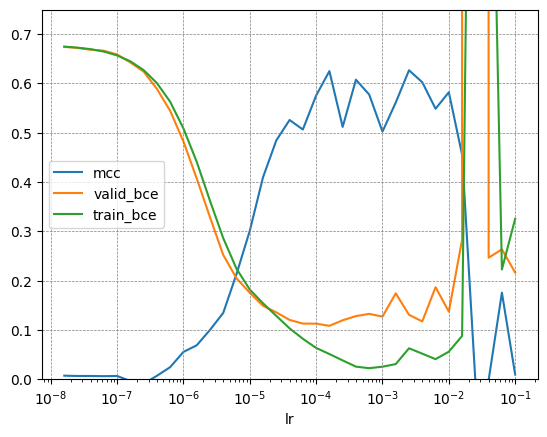

In [5]:

VALID_FOLD = 0
ax = df[(df['valid_fold'] == VALID_FOLD) & (df['lr'] <= 1e-1)].plot(x='lr', y=['mcc', 'valid_bce', 'train_bce'], logx=True, ylim=(0, 0.75))


for n in range(-8, 0):
    ax.axvline(10**n, color='gray', linestyle='--', linewidth=0.5)
    
for n in range(0, 8):
    ax.axhline(n/10, color='gray', linestyle='--', linewidth=0.5)

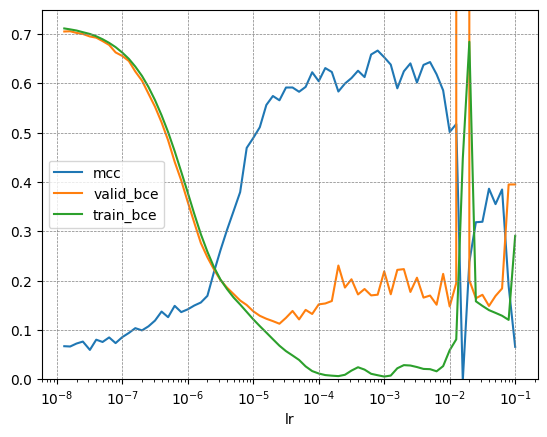

In [6]:

VALID_FOLD = 1
ax = df[(df['valid_fold'] == VALID_FOLD) & (df['lr'] <= 1e-1)].plot(x='lr', y=['mcc', 'valid_bce', 'train_bce'], logx=True, ylim=(0, 0.75))


for n in range(-8, 0):
    ax.axvline(10**n, color='gray', linestyle='--', linewidth=0.5)
    
for n in range(0, 8):
    ax.axhline(n/10, color='gray', linestyle='--', linewidth=0.5)

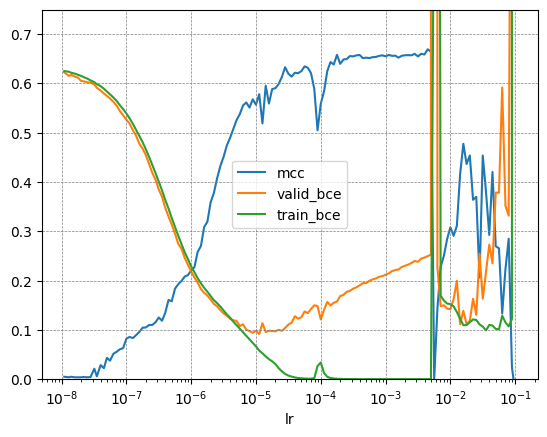

In [7]:

VALID_FOLD = 2
ax = df[(df['valid_fold'] == VALID_FOLD) & (df['lr'] <= 1e-1)].plot(x='lr', y=['mcc', 'valid_bce', 'train_bce'], logx=True, ylim=(0, 0.75))


for n in range(-8, 0):
    ax.axvline(10**n, color='gray', linestyle='--', linewidth=0.5)
    
for n in range(0, 8):
    ax.axhline(n/10, color='gray', linestyle='--', linewidth=0.5)

In [2]:
import pandas as pd
df_sch = pd.read_csv('result_cv/result_cv_sch.csv')

In [9]:
df_ud10 = df_sch.query('step_size_up == 10 and step_size_down == 10').reset_index()
df_ud15 = df_sch.query('step_size_up == 15 and step_size_down == 15').reset_index()
df_ud20 = df_sch.query('step_size_up == 20 and step_size_down == 20').reset_index()
df_ud25 = df_sch.query('step_size_up == 25 and step_size_down == 25').reset_index()

Row with maximum valid_mcc:
19    0.6707
Name: mcc, dtype: float64
Last row:
19    0.6707
Name: mcc, dtype: float64


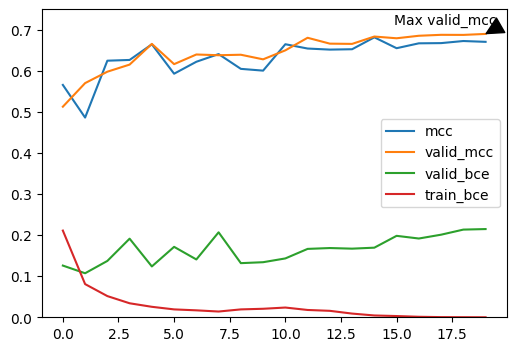

In [25]:
import matplotlib.pyplot as plt

def plot_with_max_valid_mcc(df):
    # Step 1: Find the maximum 'valid_mcc' and its index.
    max_valid_mcc = df['valid_mcc'].max()
    max_mcc_row = df[df['valid_mcc'] == max_valid_mcc]
    
    # Step 2: Plot the specified columns.
    ax = df.plot(y=['mcc', 'valid_mcc', 'valid_bce', 'train_bce'], ylim=(0, 0.75), figsize=(6, 4))
    
    # Step 3: Highlight the row where 'valid_mcc' is maximum.
    # Assuming 'valid_mcc' is related to an x-axis value like an index or a specific column.
    for idx, row in max_mcc_row.iterrows():
        ax.annotate('Max valid_mcc', xy=(idx, max_valid_mcc), xytext=(idx+0.5, max_valid_mcc+0.05),
                    arrowprops=dict(facecolor='black', shrink=0.05),
                    horizontalalignment='right', verticalalignment='top')
    
    # Optional: Display the row data as text on the plot, or just print it out.
    print("Row with maximum valid_mcc:")
    print(max_mcc_row['mcc'])
    
    print("Last row:")
    print(df.iloc[[-1]]['mcc'])

    plt.show()

# Example usage:
plot_with_max_valid_mcc(df_ud10)


Row with maximum valid_mcc:
22    0.6614
Name: mcc, dtype: float64
Last row:
29    0.6698
Name: mcc, dtype: float64


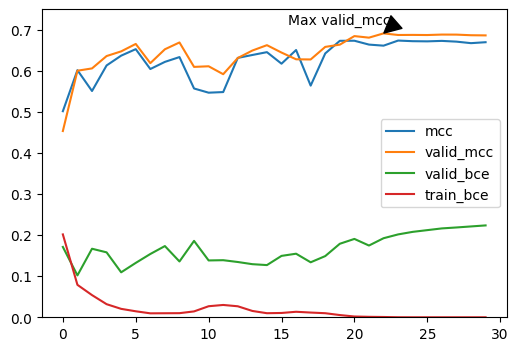

In [26]:
plot_with_max_valid_mcc(df_ud15)

Row with maximum valid_mcc:
66    0.6698
Name: mcc, dtype: float64
Last row:
79    0.667
Name: mcc, dtype: float64


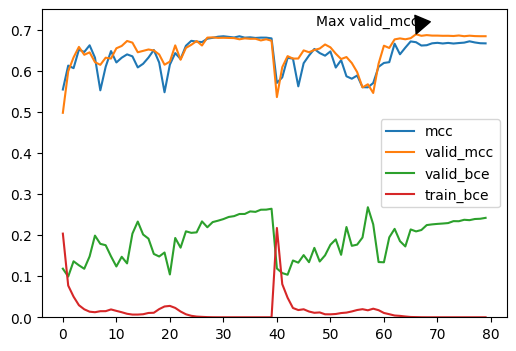

In [27]:
plot_with_max_valid_mcc(df_ud20)

Row with maximum valid_mcc:
81    0.6619
Name: mcc, dtype: float64
Last row:
99    0.6573
Name: mcc, dtype: float64


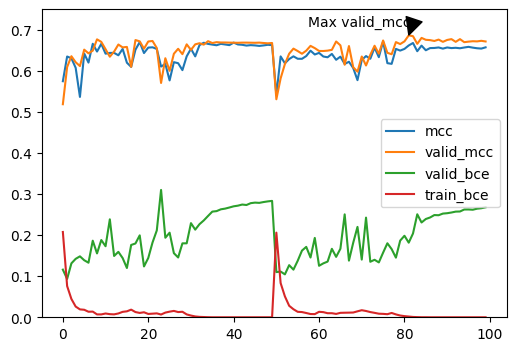

In [28]:
plot_with_max_valid_mcc(df_ud25)

<Axes: >

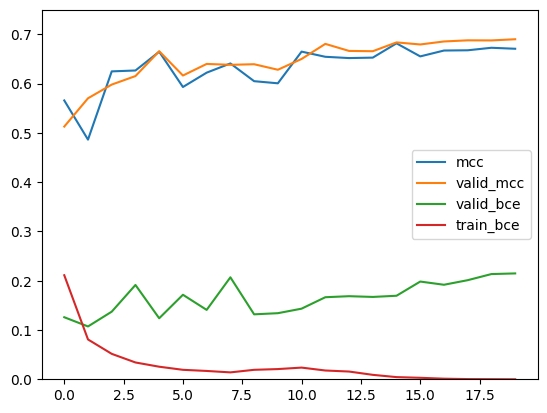

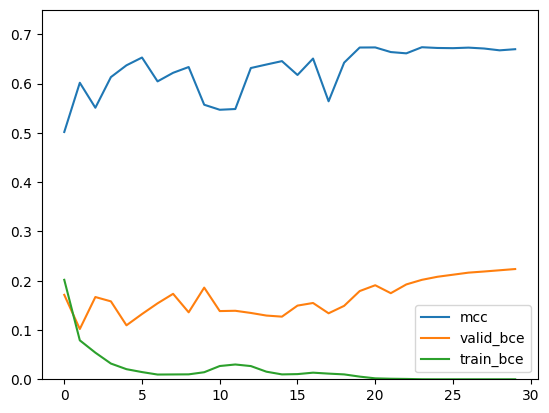

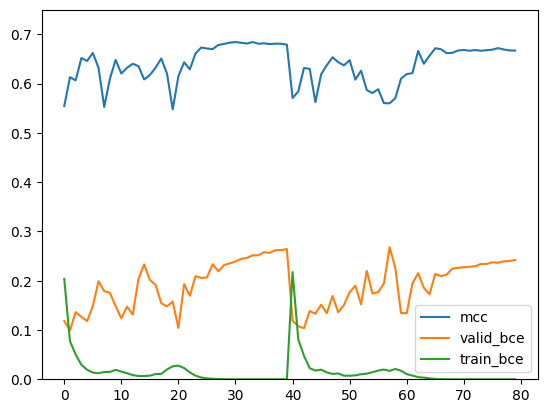

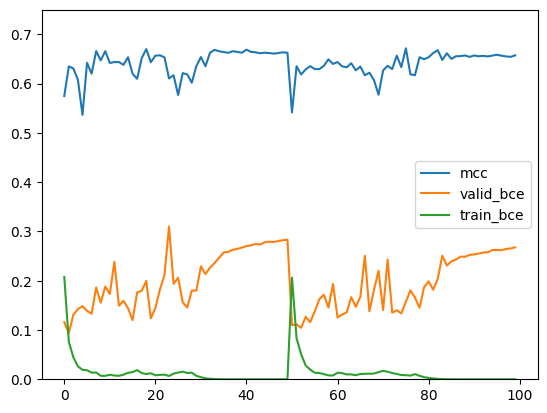

In [7]:
df_ud10.plot(y=['mcc', 'valid_mcc', 'valid_bce', 'train_bce'], ylim=(0, 0.75))
df_ud15.plot(y=['mcc', 'valid_bce', 'train_bce'], ylim=(0, 0.75))
df_ud20.plot(y=['mcc', 'valid_bce', 'train_bce'], ylim=(0, 0.75))
df_ud25.plot(y=['mcc', 'valid_bce', 'train_bce'], ylim=(0, 0.75))